# **Projeto DATASUS**

## DESAFIO
- Coletar da Base de Dados do DATASUS, de 2008 a 2024, e processar dados demográficos e de históricos de internações, recursos aplicados e óbitos hospitalares nos municípios brasileiros;
- Desenvolver modelos de redes neurais para identificar padrões e prever a evolução das taxas de óbito em cada município;
- Evidenciar as recomendações e avaliações sobre a alocação de recursos e estratégias de saúde pública hospitalar.


## **Importação das Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## **PRÉ-PROCESSAMENTO DOS DADOS**


In [3]:
base_folder = 'data'
output_subfolder = 'dataset'
output_folder = os.path.join(base_folder, output_subfolder)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Lista para armazenar todos os dataframes
dfs = []

for year_folder in os.listdir(base_folder):
    if year_folder.isdigit() and 2022 <= int(year_folder) <= 2024:
        year_path = os.path.join(base_folder, year_folder)
        files = [f for f in os.listdir(year_path) if f.endswith('.csv')]
        for file in files:
            # Carregar o dataframe, pulando a primeira linha
            df = pd.read_csv(os.path.join(year_path, file),
                             skiprows=1, delimiter=';')
            month = file.split('_')[-1].replace('.csv', '')
            df['Ano'] = int(year_folder)
            df['Mês'] = int(month) 
            dfs.append(df)
# Concatenar todos os dataframes
dados_unificados = pd.concat(dfs, ignore_index=True)
dados_unificados['Município'] = dados_unificados['Município'].apply(lambda x: x.split(' ')[0] if 'Total' not in x else x)  
dados_unificados= dados_unificados.apply(lambda x: x.str.replace(',','.') if x.dtype == "object" else x)
dados_unificados.replace('-', 0, inplace=True)
dados_unificados = dados_unificados.apply(pd.to_numeric, errors='ignore')

In [4]:
# Salvar o DataFrame em um arquivo CSV
output_path = os.path.join(output_folder, 'dados1_2022-2024.csv')
dados_unificados.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f'Dados salvos em: {output_path}')

Dados salvos em: data\dataset\dados1_2022-2024.csv


In [5]:
# Verificar dados faltantes
print(f'\ndescrição do dataset:\n{dados_unificados.describe()}')

print(f'\nNúmero de valores nulos:\n{dados_unificados.isnull().sum()}\n')
print(dados_unificados.dtypes)



descrição do dataset:
       AIH_aprovadas   Internações   Valor_total  Valor_serviços_hospitalares  \
count   9.247700e+04  9.247700e+04  9.247700e+04                 9.247700e+04   
mean    7.341844e+02  7.263592e+02  1.148246e+06                 9.040194e+05   
std     2.014110e+04  1.992721e+04  3.164148e+07                 2.487649e+07   
min     1.000000e+00  1.000000e+00  4.422000e+01                 3.334000e+01   
25%     2.800000e+01  2.800000e+01  1.149777e+04                 9.517100e+03   
50%     7.900000e+01  7.900000e+01  3.665128e+04                 2.867922e+04   
75%     2.300000e+02  2.280000e+02  1.492483e+05                 1.089346e+05   
max     1.213525e+06  1.202324e+06  1.982085e+09                 1.495108e+09   

       Val_serv_hosp_-_compl_federal  Val_serv_hosp_-_compl_gestor  \
count                   9.247700e+04                  9.247700e+04   
mean                    1.107306e+04                  5.098454e+02   
std                     5.146831e+05 

## **CORRELAÇÃO** 

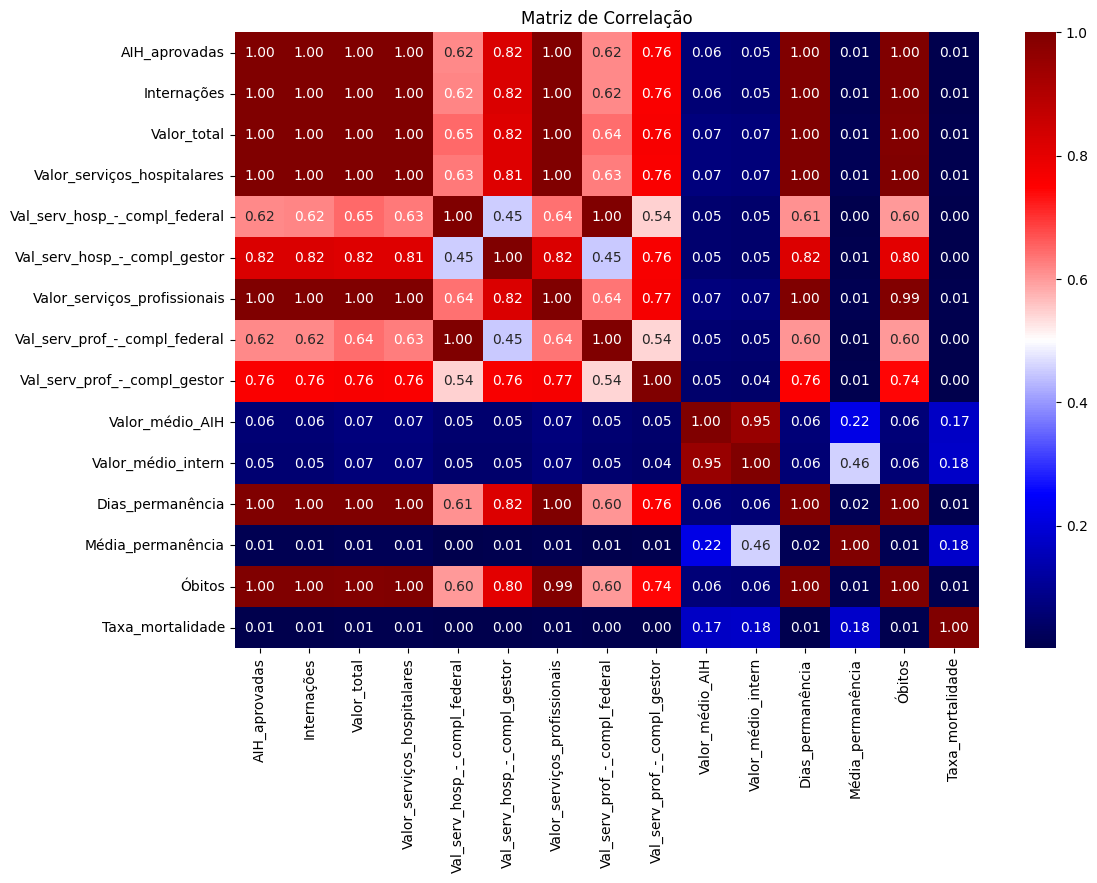

In [8]:

data = dados_unificados.copy()
data = data.drop(columns=['Ano','Mês'])
numeric_df = data.select_dtypes(include=[np.number])

# Calcular a matriz de correlação
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='seismic', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## **TREINAMENTO**

## **AVALIAÇÃO DO MODELO**